In [1]:
# Description: Given a data set about patients (age, gender, ...). Predict if they are diabete or not
# Problem: classification problem

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Read the training data
train_data = pd.read_csv('datasets/train.csv')

# Drop the Id column
train_data = train_data.drop('Id', axis=1)

# Explore the data
print("Information of the data: ")
print(train_data.info())

print("\nNull values: ")
print(train_data.isna().sum())

print("\nDuplicate values: ")
print(train_data.duplicated().sum())

print("\nDescription of the data: ")
print(train_data.describe())

print("\nFirst 5 rows of the data: ")
print(train_data.head())

Information of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               550 non-null    int64  
 1   Glucose                   550 non-null    int64  
 2   BloodPressure             550 non-null    int64  
 3   SkinThickness             550 non-null    int64  
 4   Insulin                   550 non-null    int64  
 5   BMI                       550 non-null    float64
 6   DiabetesPedigreeFunction  550 non-null    float64
 7   Age                       550 non-null    int64  
 8   Outcome                   550 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 38.8 KB
None

Null values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigr

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

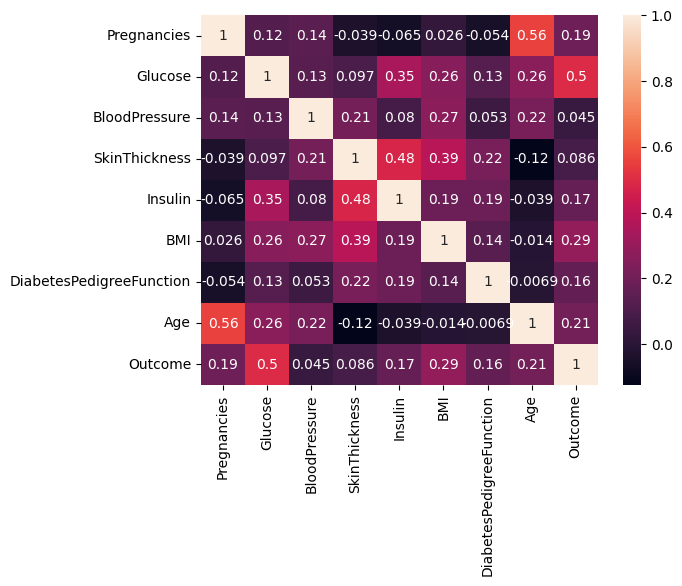

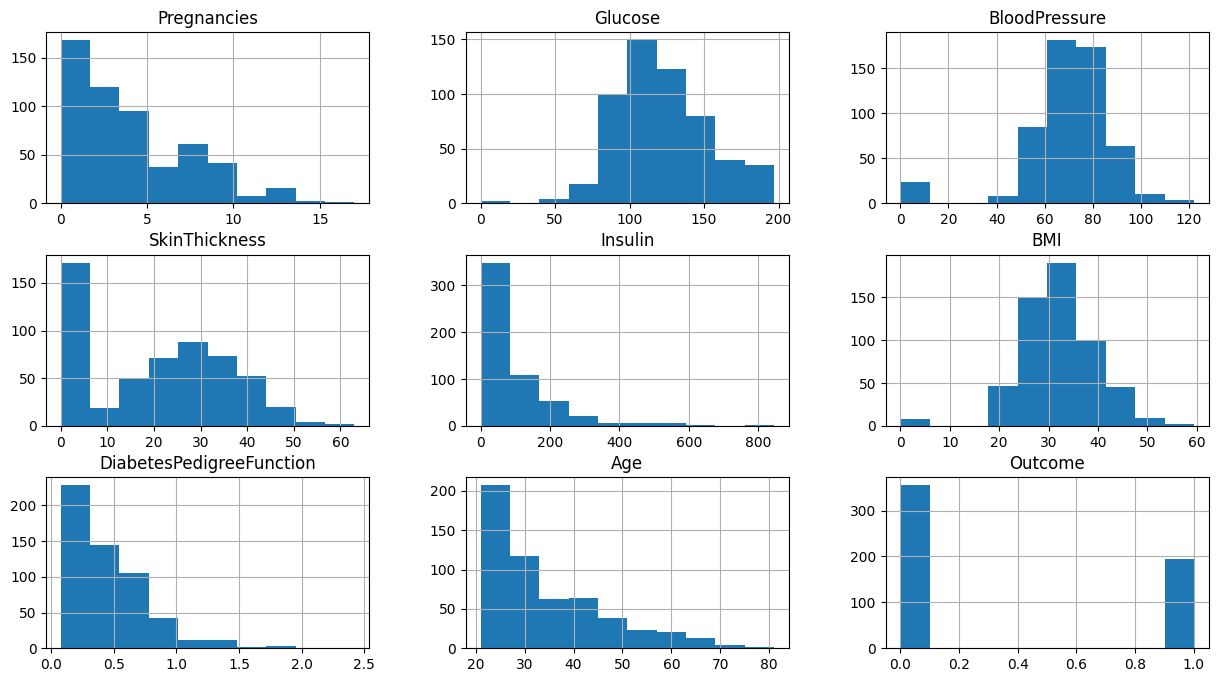

In [14]:
# Data visualization
sns.heatmap(train_data.corr(), annot=True)

train_data.hist(figsize=(15,8))

In [16]:
# Preprocessing
X = train_data.drop('Outcome', axis=1)
y = train_data['Outcome']

# Divide the data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Using SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_valid = scaler.transform(X_valid)

In [24]:
# Score function
def score_of_model(model, test_data, actual_data):
    prediction = model.predict(test_data)
    cm = confusion_matrix(prediction, actual_data)
    f1 = f1_score(prediction, actual_data)
    roc = roc_auc_score(prediction, actual_data)
    print(f'Confusion matrix: {cm}')
    print(f'F1 score: {f1}')
    print(f'ROC AUC score: {roc}')

In [26]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0, n_jobs=2)

In [36]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 15]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=4, n_jobs=2)
grid_search.fit(X_scaled_train, y_train)
best_rf_model = grid_search.best_estimator_

In [31]:
# Evaluation on test set
score_of_model(best_rf_model, X_scaled_valid, y_valid)

Confusion matrix: [[53 10]
 [19 28]]
F1 score: 0.6588235294117647
ROC AUC score: 0.7185072610604525


In [32]:
best_rf_model

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       n_jobs=2, random_state=0)

In [53]:
test_data = pd.read_csv('datasets/test.csv')
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,6,148,72,35,0,33.6,0.627,50,0
1,8,183,64,0,0,23.3,0.672,32,2
2,0,137,40,35,168,43.1,2.288,33,4
3,3,78,50,32,88,31.0,0.248,26,6
4,7,100,0,0,0,30.0,0.484,32,15


In [54]:
test_data = test_data.drop('Id', axis=1)
test_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,8,183,64,0,0,23.3,0.672,32
2,0,137,40,35,168,43.1,2.288,33
3,3,78,50,32,88,31.0,0.248,26
4,7,100,0,0,0,30.0,0.484,32


In [56]:
predictions = best_rf_model.predict(test_data)
submission = pd.read_csv('datasets/sample_submission.csv')
submission['Outcome'] = predictions
submission.to_csv('datasets/submission.csv')

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [57]:
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)